In [1]:
import pandas as pd
import matplotlib as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book= pd.read_csv("book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
min(book.mean()),max(book.mean())

(0.037, 0.431)

In [4]:
frequent_itemsets = apriori(book, min_support=0.04, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(GeogBks, CookBks, RefBks, ChildBks, YouthBks)"
129,0.0465,"(GeogBks, CookBks, ChildBks, YouthBks, ArtBks)"
130,0.0450,"(GeogBks, CookBks, DoItYBks, RefBks, ChildBks)"
131,0.0535,"(GeogBks, CookBks, DoItYBks, ChildBks, ArtBks)"


In [5]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
130,"(GeogBks, ChildBks, DoItYBks, ArtBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
131,"(GeogBks, DoItYBks, ArtBks)","(CookBks, ChildBks)",0.0730,0.256,0.0535,0.732877,2.862800,0.034812,2.785231
132,"(GeogBks, RefBks, CookBks, ArtBks)",(ChildBks),0.0460,0.423,0.0405,0.880435,2.081406,0.021042,4.825818
133,"(GeogBks, RefBks, ChildBks, ArtBks)",(CookBks),0.0495,0.431,0.0405,0.818182,1.898334,0.019166,3.129500


In [6]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51,(ItalArt),"(CookBks, ArtBks)",0.0485,0.167,0.0410,0.845361,5.062041,0.032900,5.386733
6,(ItalArt),(ArtBks),0.0485,0.241,0.0485,1.000000,4.149378,0.036812,inf
49,"(ItalArt, CookBks)",(ArtBks),0.0410,0.241,0.0410,1.000000,4.149378,0.031119,inf
89,"(RefBks, ItalCook)","(CookBks, ChildBks)",0.0465,0.256,0.0415,0.892473,3.486223,0.029596,6.919200
97,"(GeogBks, ItalCook)","(CookBks, ChildBks)",0.0640,0.256,0.0525,0.820312,3.204346,0.036116,4.140522
...,...,...,...,...,...,...,...,...,...
22,"(ItalCook, CookBks)",(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548


In [7]:
rules[rules.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
6,(ItalArt),(ArtBks),0.0485,0.241,0.0485,1.000000,4.149378,0.036812,inf
10,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
23,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
24,(ItalCook),"(CookBks, ChildBks)",0.1135,0.256,0.0850,0.748899,2.925385,0.055944,2.962947
...,...,...,...,...,...,...,...,...,...
128,"(GeogBks, RefBks, DoItYBks)","(CookBks, ChildBks)",0.0585,0.256,0.0450,0.769231,3.004808,0.030024,3.224000
130,"(GeogBks, ChildBks, DoItYBks, ArtBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
131,"(GeogBks, DoItYBks, ArtBks)","(CookBks, ChildBks)",0.0730,0.256,0.0535,0.732877,2.862800,0.034812,2.785231
132,"(GeogBks, RefBks, CookBks, ArtBks)",(ChildBks),0.0460,0.423,0.0405,0.880435,2.081406,0.021042,4.825818


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

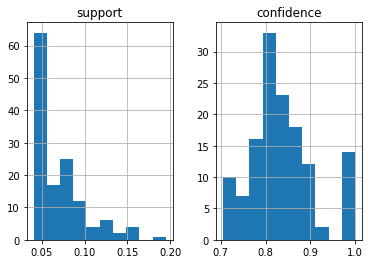

In [8]:
rules[["support","confidence"]].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

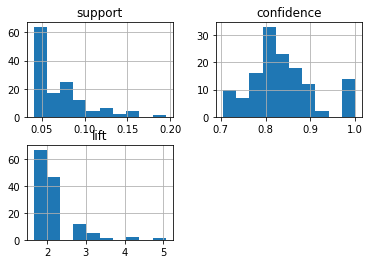

In [9]:
rules[["support", "confidence"  ,"lift"]].hist()

In [10]:
movies=pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [11]:
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [12]:
min(df.mean()),max(df.mean())

(0.1, 0.7)

In [13]:
frequent_itemsets2 = apriori(df, min_support=0.40, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Patriot, Sixth Sense, Gladiator, V3_Sixth Sen..."
59,0.4,"(Sixth Sense, V1_Gladiator, Gladiator, V3_Sixt..."
60,0.4,"(Patriot, Sixth Sense, V1_Gladiator, V3_Sixth ..."
61,0.4,"(Patriot, V1_Gladiator, Gladiator, V3_Sixth Se..."


In [14]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.70)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(V3_Sixth Sense),(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
373,"(Sixth Sense, V2_Patriot)","(V1_Gladiator, V3_Sixth Sense, Gladiator, Patr...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
374,"(V1_Gladiator, V3_Sixth Sense)","(Sixth Sense, V2_Patriot, Gladiator, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
375,"(Gladiator, V3_Sixth Sense)","(Sixth Sense, V2_Patriot, V1_Gladiator, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
376,"(V2_Patriot, V3_Sixth Sense)","(Sixth Sense, Gladiator, V1_Gladiator, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


In [15]:
rules2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
377,(V3_Sixth Sense),"(Patriot, Sixth Sense, V1_Gladiator, Gladiator...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
108,"(Gladiator, V3_Sixth Sense)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
278,"(Sixth Sense, Gladiator, V1_Gladiator)","(V2_Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
274,"(Sixth Sense, V2_Patriot, Gladiator, V1_Gladia...",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
117,"(Sixth Sense, Gladiator, V1_Gladiator)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
21,"(Sixth Sense, Gladiator)",(V1_Gladiator),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
24,"(Sixth Sense, Gladiator)",(V2_Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
227,"(Sixth Sense, Gladiator)","(V1_Gladiator, V2_Patriot, Patriot)",0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


In [16]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(V3_Sixth Sense),(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
373,"(Sixth Sense, V2_Patriot)","(V1_Gladiator, V3_Sixth Sense, Gladiator, Patr...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
374,"(V1_Gladiator, V3_Sixth Sense)","(Sixth Sense, V2_Patriot, Gladiator, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
375,"(Gladiator, V3_Sixth Sense)","(Sixth Sense, V2_Patriot, V1_Gladiator, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
376,"(V2_Patriot, V3_Sixth Sense)","(Sixth Sense, Gladiator, V1_Gladiator, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
